<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float6

<ipython-input-1-64e315345369>:65: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


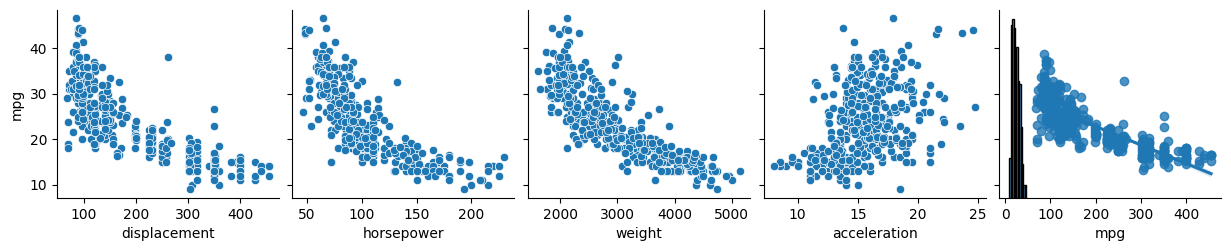

In [1]:
# -*- coding: utf-8 -*-
"""mileage_project

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/12uCt7RpBs_ApQNvhKd-akqZuHnrZOkS1

**Mileage Prediction - Regression Analysis**

**Source:**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition
**Data Set Information:**

This dataset is a slightly modified version of the dataset provided in the StatLib library. in line with the use by Ross Quinlan (1993) in predicting the attribute mpg, 8 of the original instances were removed because they had unknown values for the 'mpg" attribute. The original dataset is available in the file "auto-mpg.data-original

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes" (Quinlan, 1993)


**Attribute Information:**

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

# New Section

# New Section

**Import Library**
"""

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
df.head()

df.nunique()

df.info()

df.describe()

df.corr()

"""**Remove Missing Values**"""

df=df.dropna()

df.info()

"""**Data Visualization**"""

sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

sns.regplot(x='displacement',y='mpg',data=df);

"""**Define Targent Variable Y and Feature X**"""

df.columns

y=df['mpg']

y.shape

x=df[['displacement','horsepower','weight','acceleration']]

x.shape

x

"""**Scaling Data**"""

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x=ss.fit_transform(x)

x

pd.DataFrame(x).describe()

"""After Standardization Mean is Zero and Standard Deviation is One

**Train Test Split Data**
"""

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

x_train.shape,x_test.shape,y_train.shape,y_train.shape

"""**Linear Regression Model**"""

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

lr.intercept_

lr.coef_

"""**Mileage=23.4-1.05Displacement-1.68Horsepower-4.10Weight-0.115Acceleration+error**

**Predict Test Data**
"""

y_pred=lr.predict(x_test)

y_pred

"""**Model Accuracy**"""

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

mean_absolute_error(y_test,y_pred)

mean_absolute_percentage_error(y_test,y_pred)

r2_score(y_test,y_pred)

"""**Polynomial Regression**

"""

from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

x_train2=poly.fit_transform(x_train)

x_test2=poly.fit_transform(x_test)

lr.fit(x_train2,x_train)

lr.intercept_

lr.coef_

y_pred_poly=lr.predict(x_test2)